<a href="https://colab.research.google.com/github/AmanSharmas/Capstone-project--1-/blob/main/Mobile_Price_Range_Prediction_Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [34]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [35]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Dataset Loading

In [36]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Load Dataset Aman
working_dir='/content/drive/MyDrive/Data/'
dataset=pd.read_csv(working_dir + 'data_mobile_price_range.csv')

In [38]:
# # Load Dataset Harish
# working_dir='/content/drive/MyDrive/Almabetter/Module 3/Capstone project 3/'
# dataset=pd.read_csv(working_dir + 'data_mobile_price_range.csv')

### Dataset First View

In [39]:
# Dataset First Look
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [40]:
# Dataset Rows & Columns count
dataset.shape

(2000, 21)

### Dataset Information

In [41]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [42]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].count()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Missing Values/Null Values

In [43]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


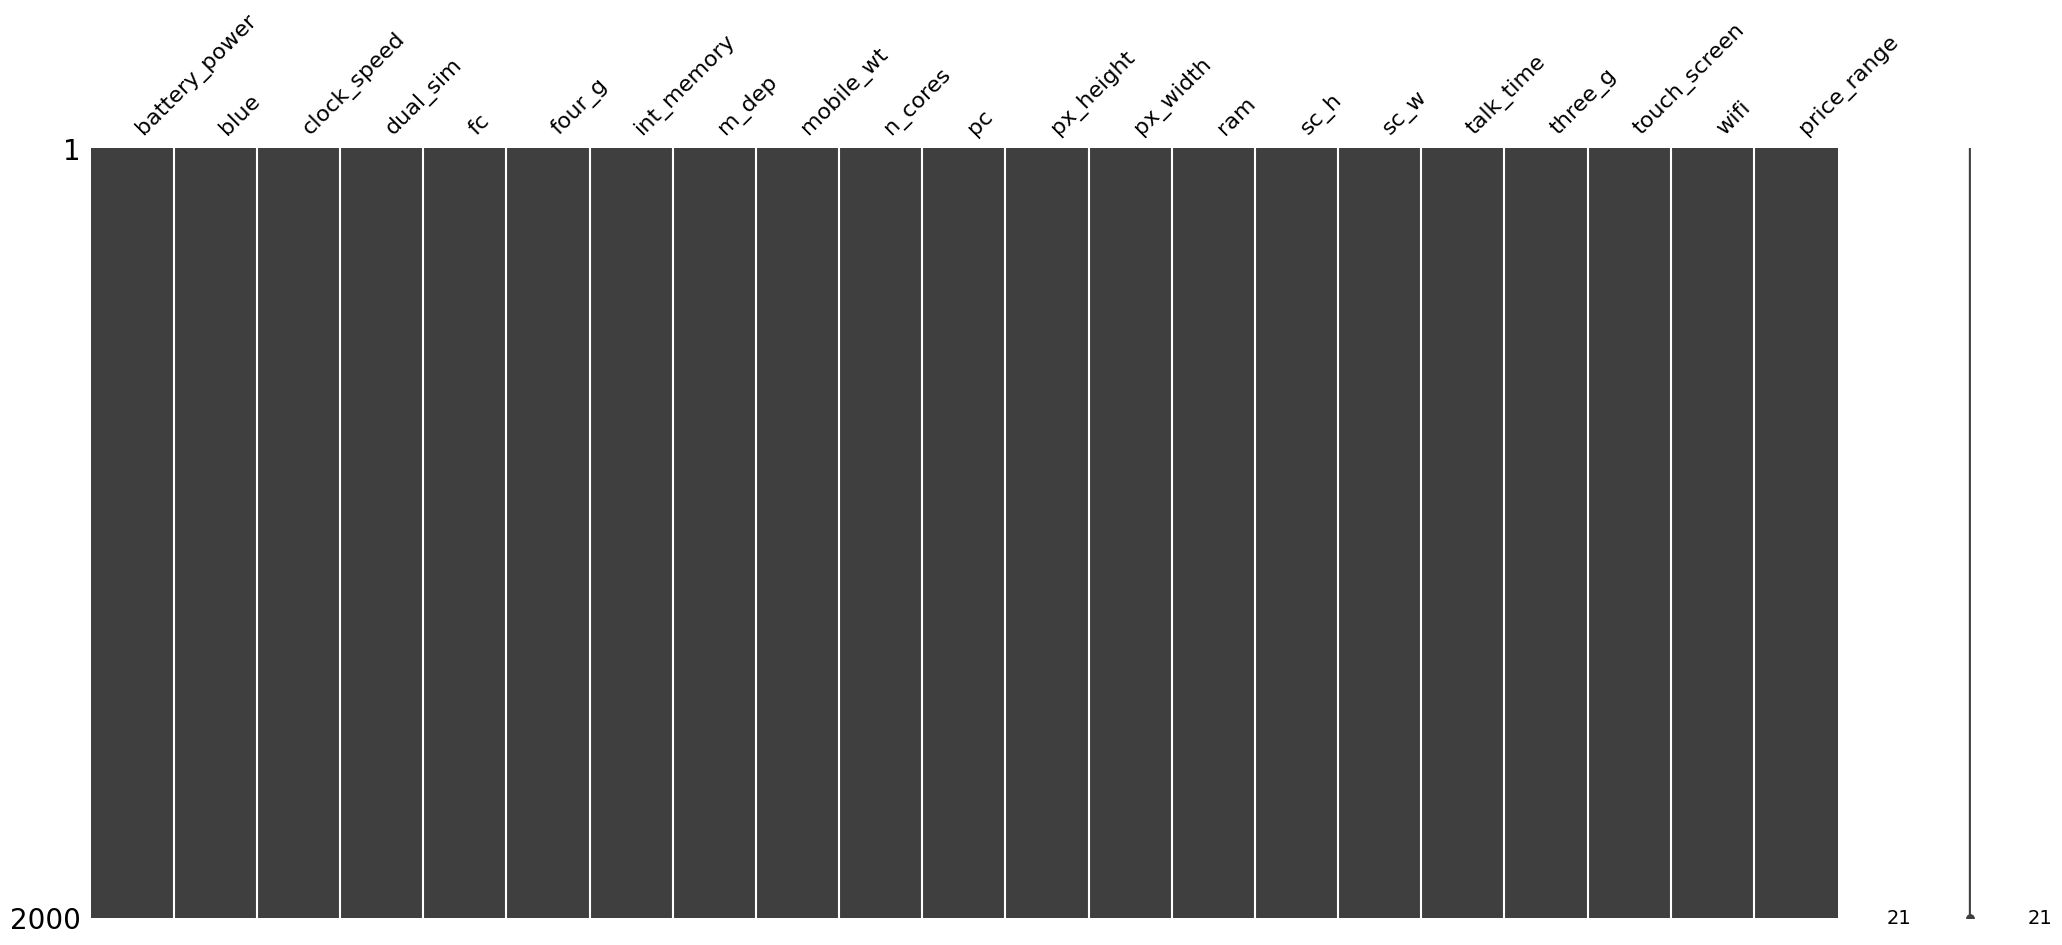

In [44]:
# Visualizing the missing values
import missingno as msno
msno.matrix(dataset)
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [45]:
# Dataset Columns
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [46]:
# Dataset Describe
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description 

* Battery_power - Battery capacity in mAh
* Blue - Has bluetooth or not
* Clock_speed - speed at which microprocessor executes instructions
* Dual_sim - Has dual sim support or not
* Fc - Front Camera Megapixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory capacity
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores in processor
* Pc - Primary Camera Megapixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in MB
* Touch_screen - Has touch screen or not
* Wifi - Has wifi or not
* Sc_h - Screen Height in cm
* Sc_w - Screen Width in cm
* Talk_time - Longest time that a single battery charge will last over a call
* Three_g - Has 3G or not
* Price_range - This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

### Check Unique Values for each variable.

In [47]:
df = dataset.copy()

In [48]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f"Unique {i}'s count:{df[i].nunique()}")
  if i in df.columns:
    if(df[i].nunique() < 25):
      print(f"{df[i].unique()}\n")

Unique battery_power's count:1094
Unique blue's count:2
[0 1]

Unique clock_speed's count:26
Unique dual_sim's count:2
[0 1]

Unique fc's count:20
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

Unique four_g's count:2
[0 1]

Unique int_memory's count:63
Unique m_dep's count:10
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

Unique mobile_wt's count:121
Unique n_cores's count:8
[2 3 5 6 1 8 4 7]

Unique pc's count:21
[ 2  6  9 14  7 10  0 15  1 18 17 11 16  4 20 13  3 19  8  5 12]

Unique px_height's count:1137
Unique px_width's count:1109
Unique ram's count:1562
Unique sc_h's count:15
[ 9 17 11 16  8 13 19  5 14 18  7 10 12  6 15]

Unique sc_w's count:19
[ 7  3  2  8  1 10  9  0 15 13  5 11  4 12  6 17 14 16 18]

Unique talk_time's count:19
[19  7  9 11 15 10 18  5 20 12 13  2  4  3 16  6 14 17  8]

Unique three_g's count:2
[0 1]

Unique touch_screen's count:2
[0 1]

Unique wifi's count:2
[1 0]

Unique price_range's count:4
[1 2 3 0]



## 3. ***Data Wrangling***

### Data Wrangling Code

In [49]:
# Write your code to make your dataset analysis ready.

In [50]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [51]:
price_range = df['price_range'].value_counts().reset_index().rename(columns={'index':'price_range','price_range':'counts'})
price_range

,price_range,counts
0,1,500
1,2,500
2,3,500
3,0,500


In [52]:
blue = df.groupby(['price_range','blue'])['blue'].count().unstack()
blue

blue,0,1
price_range,,
0,257,243
1,255,245
2,257,243
3,241,259


In [53]:
four_g_avalibility=df['four_g'].value_counts().reset_index().rename(columns= {'index':'4G','four_g':'counts'})
four_g_avalibility

,4G,counts
0,1,1043
1,0,957


In [54]:
three_g_avalibility=df['three_g'].value_counts().reset_index().rename(columns= {'index':'3G','three_g':'counts'})
three_g_avalibility

,3G,counts
0,1,1523
1,0,477


In [55]:
wifi = df['wifi'].value_counts().reset_index().rename(columns= {'index':'wifi','wifi':'counts'})
wifi

,wifi,counts
0,1,1014
1,0,986


In [56]:
# plt.figure(figsize=(7,7))
# sns.distplot(df["clock_speed"],color="y")

In [57]:
# import plotly.figure_factory as ff
# import numpy as np
# hist_data = df["clock_speed"]
# group_labels = ["clock_speed"] # name of the dataset

# fig = ff.create_distplot(hist_data, group_labels)
# fig.show()

In [58]:
import plotly.express as x

In [59]:
def BarPlot(a):
  fig = x.histogram(df, x=a,color=a,height=400,width=700)
  fig.update_layout(bargap=0.2)
  fig.show()


In [60]:
# def Bivarite_barplot(a):
#   y=df.groupby(['price_range'])[a].count()
#   fig = x.bar(y, x='price_range',y=a,title=a +'by price range',color=a, height=500,width=700)
#   fig.show()

In [61]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [62]:
# Chart - 1 visualization code
fig = go.Figure(data=[go.Pie(labels=['0','1','2','3'],values= price_range['counts'], hole=.5)])
fig.update_layout(autosize=False,width=700,height=500,title='price range counts',legend_title_text ='price range')
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [63]:
# Chart - 2 visualization code
BarPlot("blue")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [64]:
# Chart - 3 visualization code
BarPlot('dual_sim')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [65]:
# Chart - 4 visualization code
fig1 = x.pie(four_g_avalibility, values='counts', names=['4G available','4G not available'],title='4G avalibility')
fig1.update_layout(autosize=True,width=600,height=400)


In [66]:
fig = x.pie(three_g_avalibility, values='counts', names=['3G available','3G not available'],title='3G avalibility')
fig.update_layout(autosize=True,width=600,height=400)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [67]:
# Chart - 5 visualization code
fig = x.pie(wifi, values='counts', names=['wifi available','wifi not available'],title='wifi')
fig.update_layout(autosize=True,width=600,height=400)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [68]:
# Chart - 6 visualization code
BarPlot('touch_screen')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

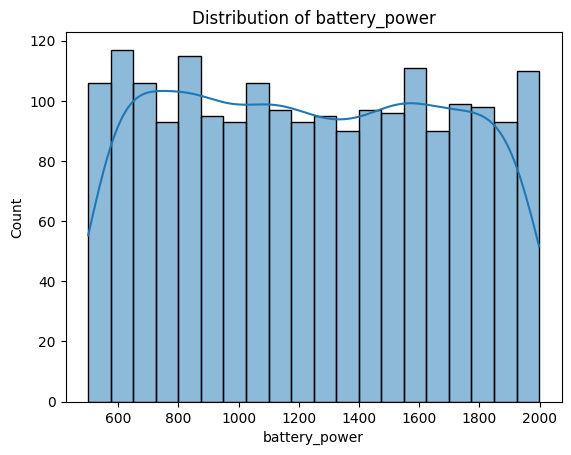

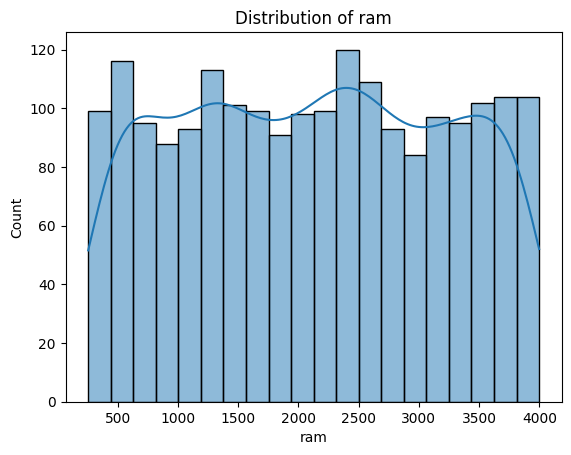

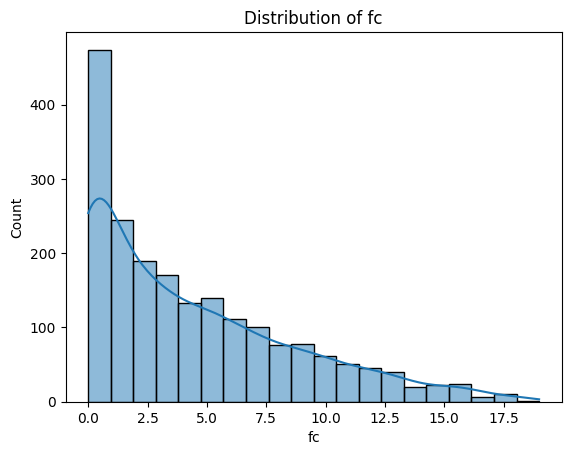

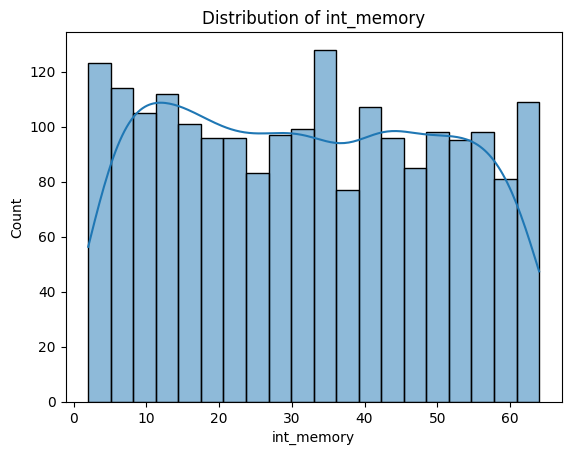

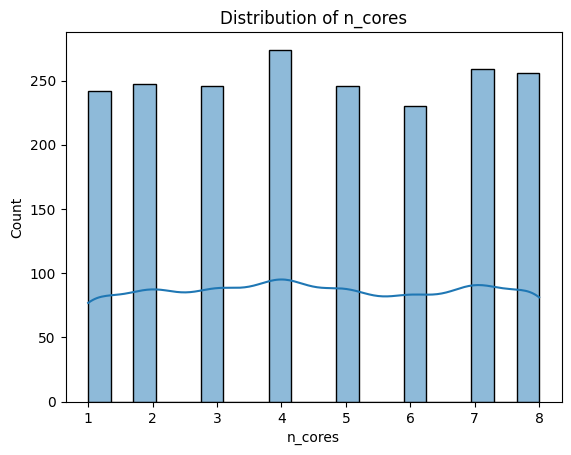

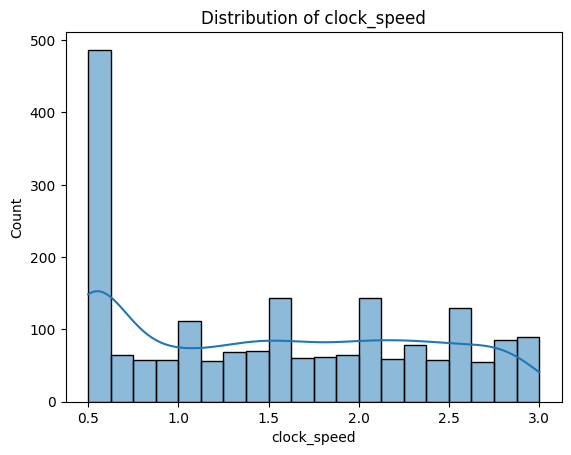

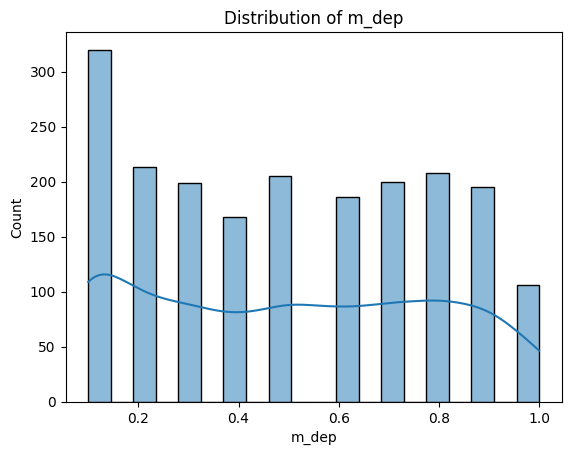

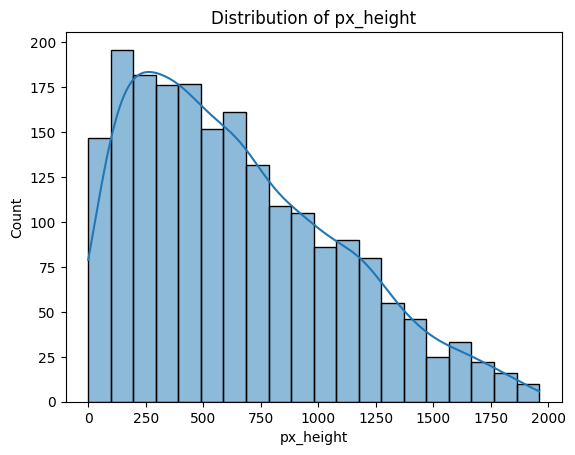

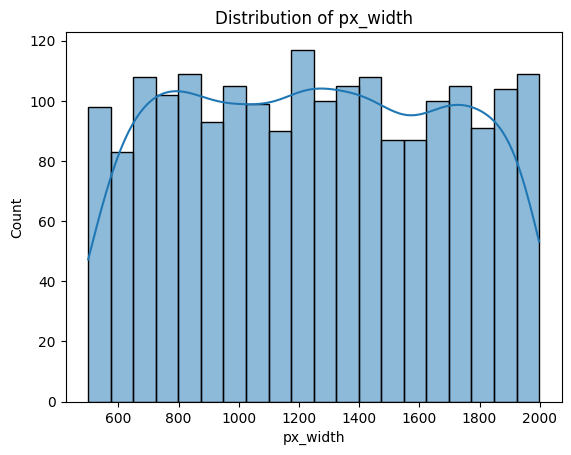

In [69]:
# Chart - 7 visualization code

# Visualize the distribution of numerical features
numerical_cols = ['battery_power', 'ram', 'fc', 'int_memory', 'n_cores', 'clock_speed', 'm_dep', 'px_height', 'px_width']
for col in numerical_cols:
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

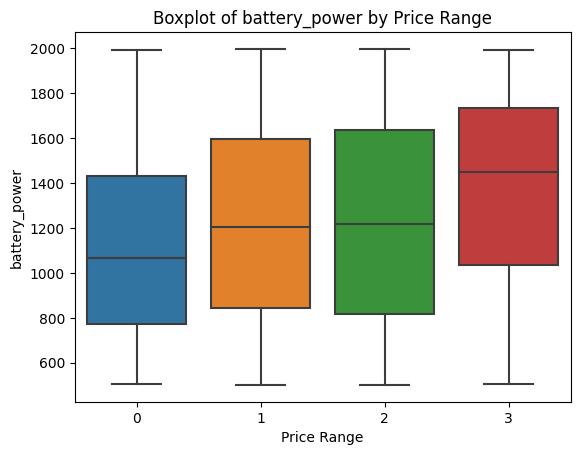

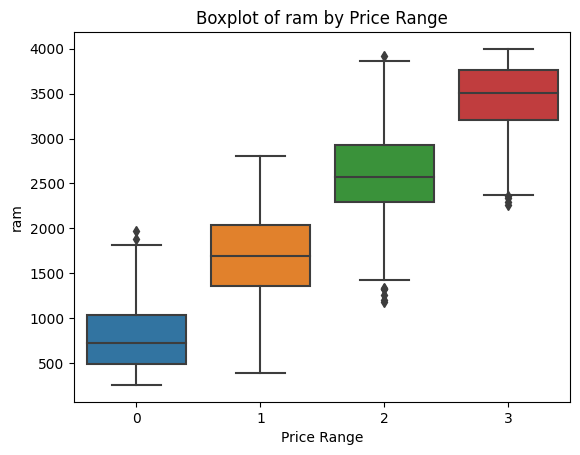

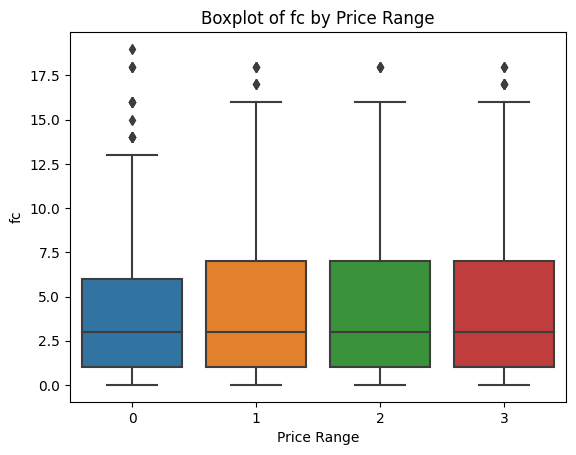

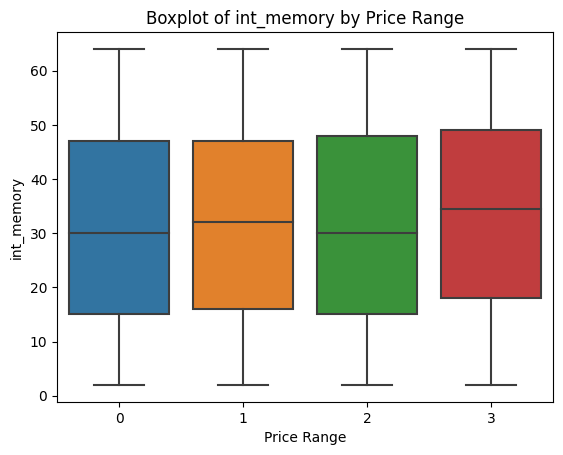

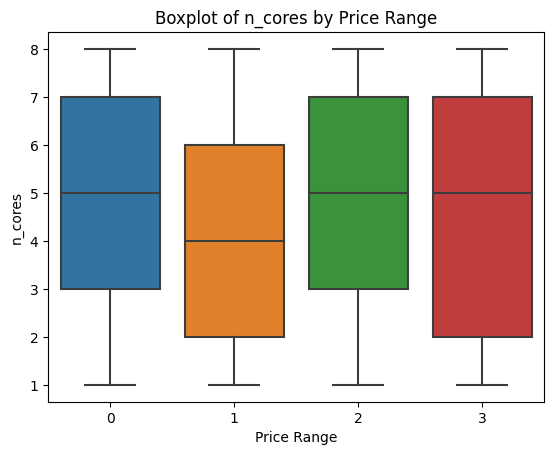

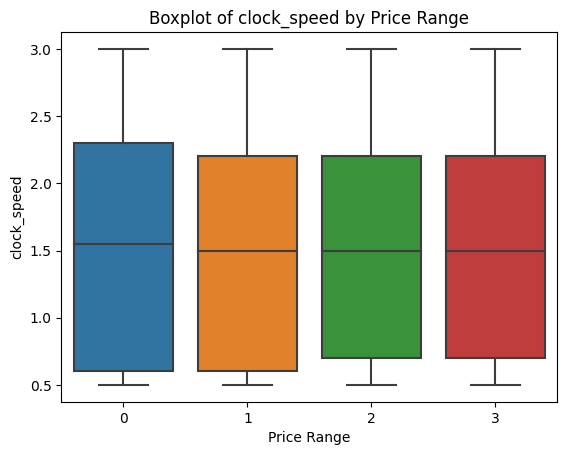

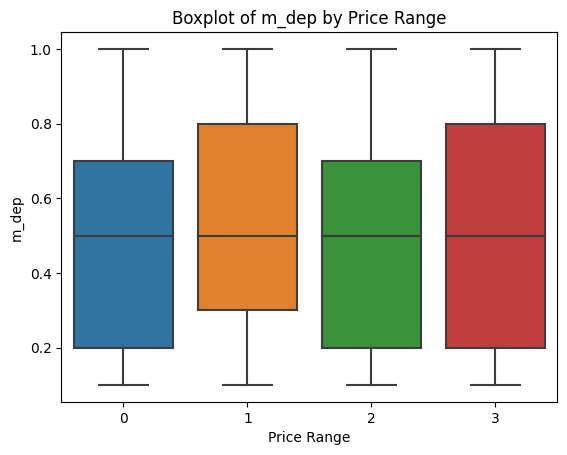

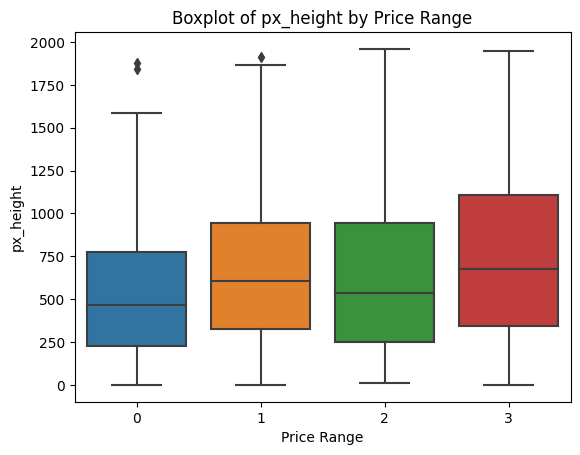

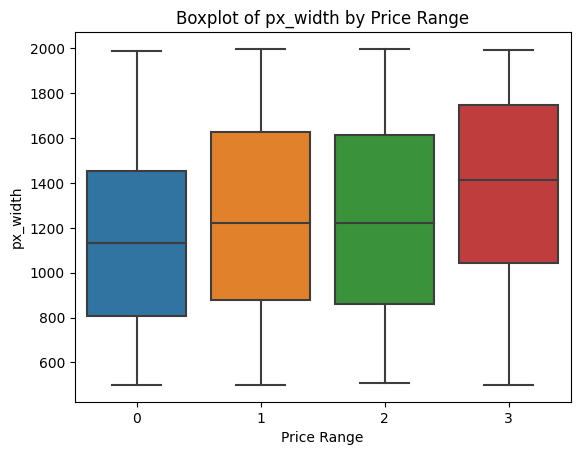

In [70]:
# Chart - 8 visualization code

# Visualize the boxplots for numerical features by price range
for col in numerical_cols:
    sns.boxplot(x='price_range', y=col, data=df)
    plt.title(f'Boxplot of {col} by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel(col)
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

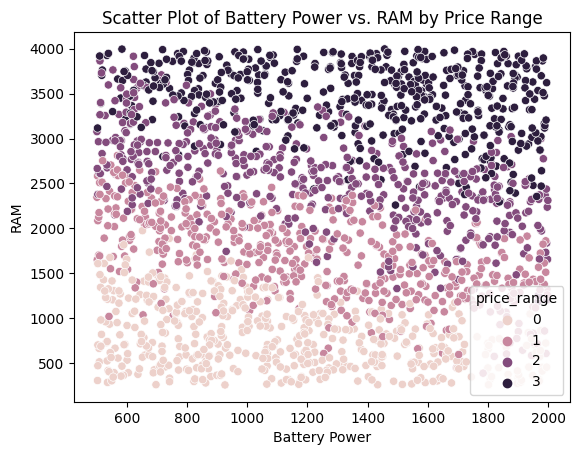

In [71]:
# Chart - 9 visualization code

sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=df)
plt.title('Scatter Plot of Battery Power vs. RAM by Price Range')
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

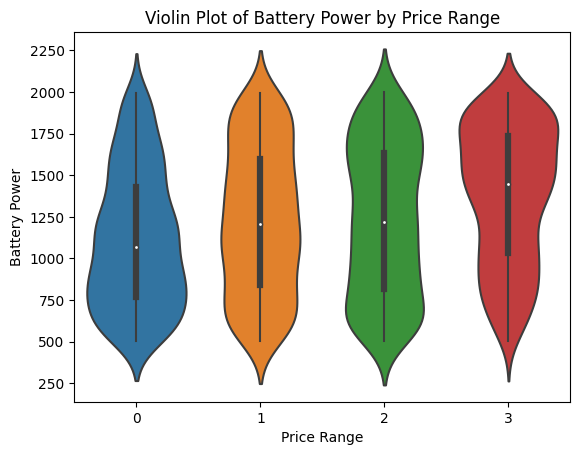

In [72]:
# Chart - 10 visualization code

sns.violinplot(x='price_range', y='battery_power', data=df)
plt.title('Violin Plot of Battery Power by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

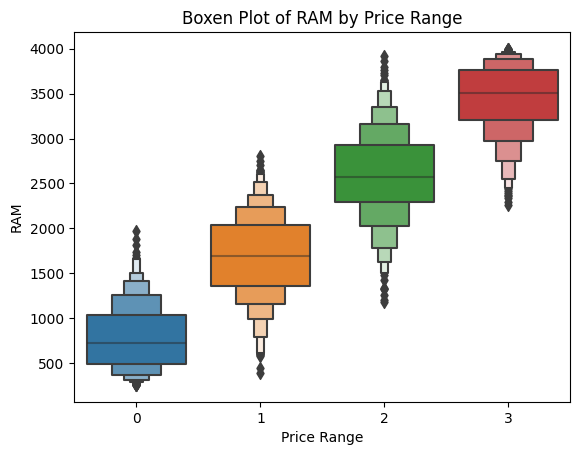

In [73]:
# Chart - 11 visualization code

sns.boxenplot(x='price_range', y='ram', data=df)
plt.title('Boxen Plot of RAM by Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

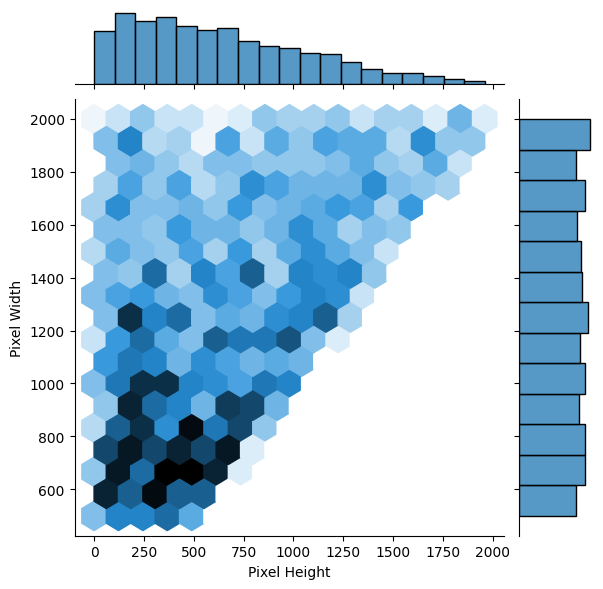

In [74]:
# Chart - 12 visualization code

sns.jointplot(x='px_height', y='px_width', data=df, kind='hex')
# plt.title('Hexbin Plot of Pixel Height vs. Pixel Width')
plt.xlabel('Pixel Height')
plt.ylabel('Pixel Width')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

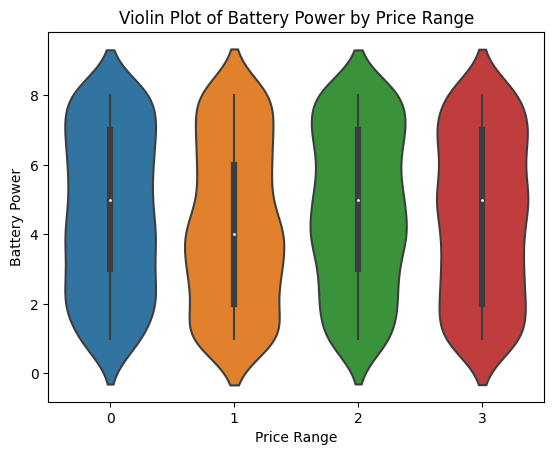

In [75]:
# Chart - 13 visualization code

sns.violinplot(x='price_range', y='n_cores', data=df)
plt.title('Violin Plot of Battery Power by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

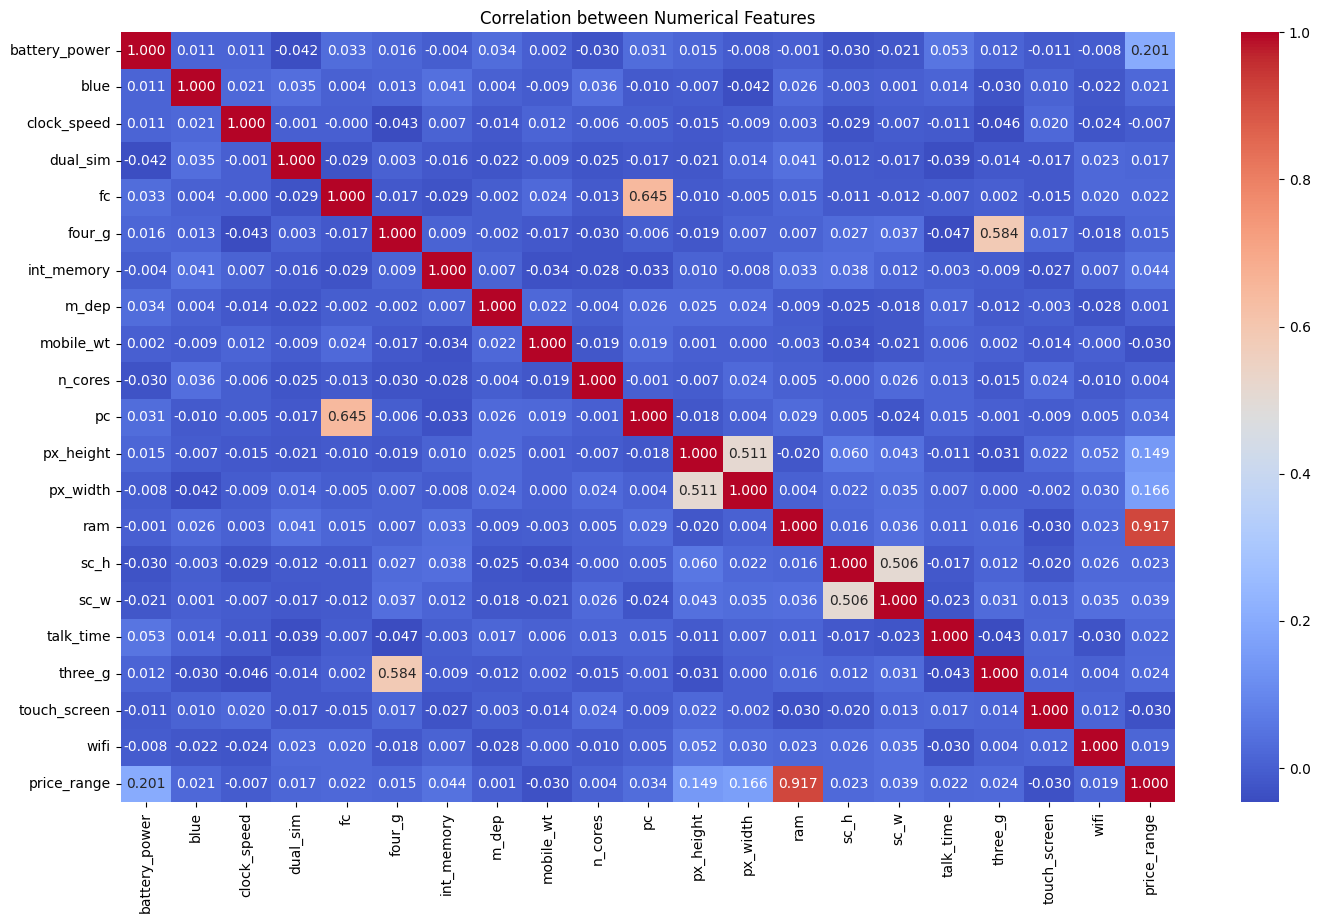

In [76]:
# Correlation Heatmap visualization code
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation between Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

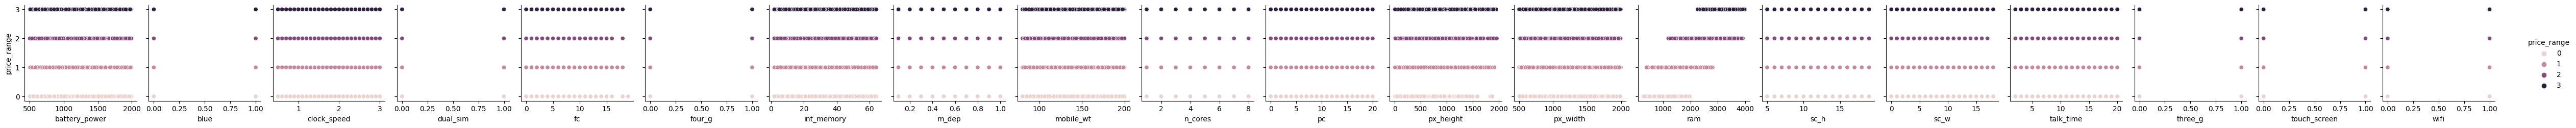

In [77]:
# Pair Plot visualization code
numeric_col = ['battery_power', 'clock_speed', 'fc','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
               'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
sns.pairplot(df, hue='price_range',y_vars = 'price_range')
# plt.suptitle('Pairwise Scatter Plots with Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [78]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [79]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [80]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [81]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [82]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [83]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [84]:
# Expand Contraction

#### 2. Lower Casing

In [85]:
# Lower Casing

#### 3. Removing Punctuations

In [86]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [87]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [88]:
# Remove Stopwords

In [89]:
# Remove White spaces

#### 6. Rephrase Text

In [90]:
# Rephrase Text

#### 7. Tokenization

In [91]:
# Tokenization

#### 8. Text Normalization

In [92]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [93]:
# POS Taging

#### 10. Text Vectorization

In [94]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [95]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [96]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [97]:
# Transform Your data

### 6. Data Scaling

In [98]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [99]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [100]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [101]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [102]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [103]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [105]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [106]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [107]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [108]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [109]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [110]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [111]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***